let's consider a simple linear regression—that is, the common case of fitting a line to $(x,y)$  data. We will use the following simple data for our regression example:

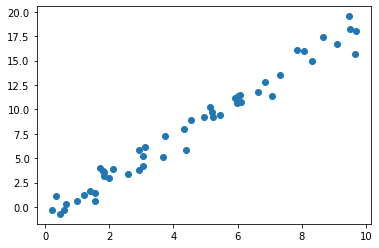

In [10]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y);

1. **Choose a class of model**

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [12]:
from sklearn.linear_model import LinearRegression

2. **Choose model hyperparameters**

For our linear regression example, we can instantiate the `LinearRegression` class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [13]:
model = LinearRegression(fit_intercept=True)
# model = LinearRegression(fit_intercept=False)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between choice of model and application of model to data.

3. **Arrange data into a features matrix and target vector**

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Here our target variable `y` is already in the correct form `(a length-n_samples array)`, but we need to massage the data `x` to make it a matrix of size `[n_samples, n_features]`. In this case, this amounts to a simple reshaping of the one-dimensional array:

In [14]:
X = x[:, np.newaxis]

5. **Fit the model to your data**

Now it is time to apply our model to data. This can be done with the `fit()` method of the model:

In [15]:
model.fit(X,y)

LinearRegression()

This `fit()` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the `fit()` process have trailing underscores; for example in this linear model, we have the following:

In [16]:
model.coef_

array([1.9776566])

In [17]:
model.intercept_

-0.9033107255311146

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of `2` and intercept of `-1`.

One question that frequently comes up regards the uncertainty in such internal model parameters. In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a statistical modeling question than a machine learning question. Machine learning rather focuses on what the model predicts.

**5. Predict labels for unknown data**

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the `predict()` method. For the sake of this example, our "new data" will be a grid of `x` values, and we will ask what `y` values the model predicts:

In [20]:
xfit = np.linspace(-1,11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

As before, we need to coerce these x values into a `[n_samples, n_features]` features matrix, after which we can feed it to the model:

In [22]:
Xfit = xfit[:, np.newaxis]  # new unseen data
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

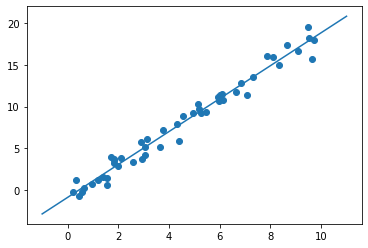

In [26]:
plt.scatter(x,y)
plt.plot(xfit, yfit);